# Lesson: Probability and Random Numbers

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


The `numpy.random` module contains several functions for generating random numbers. For example, we can use `np.random.random_integers(low, high)` to simulate rolling a die:

In [2]:
print("I rolled a", np.random.random_integers(1,6))

I rolled a 5


If we invoke `random.randint` again, we get a different number:

In [3]:
print("I rolled a", np.random.random_integers(1,6))

I rolled a 6


You can run the above cell repeatedly by pressing \[ctrl\]\[enter\] and verify that it indeed produces random numbers between 1 and 6.

(Aside: These numbers aren't truly random; they're actually produced by something called a "pseudo-random number generator", which is a program that outputs a sequence of numbers designed to be hard to predict so that it looks random. You can read more about pseudo-random number generators on your own time, but for the rest of this class we can pretend that these numbers really are random.)

We can combine random number generation with the programming constructs we've learned. For example, we can use `for i in range(number)` to roll a bunch of dice in a row:

In [4]:
for i in range(20):
    result = np.random.random_integers(1,6)
    print("I rolled a", result)

I rolled a 3
I rolled a 2
I rolled a 5
I rolled a 3
I rolled a 2
I rolled a 3
I rolled a 5
I rolled a 1
I rolled a 5
I rolled a 1
I rolled a 2
I rolled a 3
I rolled a 3
I rolled a 1
I rolled a 2
I rolled a 4
I rolled a 6
I rolled a 3
I rolled a 4
I rolled a 2


So far we've used `np.random.random_integers`, but another useful function is `np.random.choice`, which takes a list of options and chooses one of them at random. For example, we can use it to flip coins instead of rolling dice:

In [5]:
for i in range(20):
    result = np.random.choice(["Heads", "Tails"])
    print(result)

Tails
Tails
Heads
Heads
Tails
Tails
Tails
Heads
Tails
Tails
Heads
Tails
Heads
Heads
Heads
Heads
Heads
Tails
Tails
Heads


### Exercise

Following the examples above, use `random.randint` or `random.choice` to simulate something else: for example, rolling a 20-sided die, or spinning a spinner that can land on either red, green, or blue.

## Counting and summarizing results

Let's say I want to answer the following question. If I flip two coins, what is the probability that both of them are heads?

One approach to answering questions like these is to run repeated simulations: do it a bunch of times
and count how many times both of them are heads. Here's a first attempt:

In [6]:
for i in range(100):
    first = np.random.choice(["Heads", "Tails"])
    second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        print("Both flips were heads!")

Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!
Both flips were heads!


Notice that we used `for i in range(100)` above to do 100 trials, and `if` to test whether the two flips both returned heads. If they did, we print "Both flips were heads!" to the output -- so we can count how many of those there are and divide by 100 to estimate the probability ("number of times it happened, divided by the total number of times we tried").

However, counting the results one by one can take a long time. Luckily, we can program our computers to do the counting as well as the simulating! We can do this by keeping the "count so far" in a variable, and adding to it every time it happens:

In [7]:
count = 0
for i in range(100):
    first = np.random.choice(["Heads", "Tails"])
    second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        count = count + 1
        
print("Got both heads", count, "times out of 100")
print("Estimated probability:", count/100)

Got both heads 30 times out of 100
Estimated probability: 0.3


Now that we're making the computer count the results, it's feasible to do a bunch more trials (notice that the number 100 has been replaced with the variable `trials`, so that it's easy to change the number of trials by putting a different value):

In [8]:
trials = 10000
count = 0
for i in range(trials):
    first = np.random.choice(["Heads", "Tails"])
    second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        count = count + 1
        
print("Got both heads", count, "times out of", trials)
print("Estimated probability:", count/trials)

Got both heads 2492 times out of 10000
Estimated probability: 0.2492


The more trials we do, the more likely that the answer we get is close to the true probability. Try running the above cell multiple times with \[ctrl\]\[enter\]: the results should be pretty close each time (and to the true answer, if you happen to know what it is).

In addition to counting, we can also plot a histogram to visualize the distribution of results. We can do this by accumulating our results in a list and using `seaborn.countplot`:

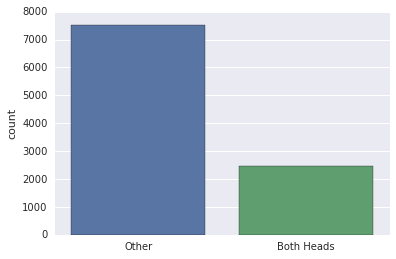

In [9]:
trials = 10000
results = []
for i in range(trials):
    first = np.random.choice(["Heads", "Tails"])
    second = np.random.choice(["Heads", "Tails"])
    if first == "Heads" and second == "Heads":
        results.append("Both Heads")
    else:
        results.append("Other")
 
seaborn.countplot(results)

Plots like this are good for displaying the results of many trials in a visual way, especially when there are more than two possible outcomes.

### Exercise

Part 1: If I roll two dice, what is the probability that they add up to 10? Use repeated simulations to estimate this probability, following the examples above.

Part 2: Use `seaborn.countplot` to plot the results you get from adding up two dice. Is every possible result equally likely?

## Extended example: the birthday paradox

How many people can you put in a room until it's more likely than not that two of them have the same birthday? You might think it's around 365, the number of days in a year -- but you may be surprised!

Let's investigate what happens if there are just 20 people in the room, and see how often it is that two of them share a birthday. To get you started, here's a function that generates random birthdays for N people (assuming there are 365 possibilities and they're all equally likely):

In [10]:
def generate_birthdays(N):
    result = []
    for i in range(N):
        birthday = np.random.random_integers(1,365)
        result.append(birthday)
    return result

And here's a function that takes a list of numbers (birthdays) and tests to see whether any two of them are the same:

In [11]:
def any_two_same(birthdays):
    seen = set()
    for birthday in birthdays:
        if birthday in seen:
            return True
        seen.add(birthday)
    return False

Make sure you run the above two cells with \[shift\]\[enter\]; then you'll be able to use those functions like this:

In [12]:
birthdays = generate_birthdays(20)
print("Birthdays:", birthdays)
if any_two_same(birthdays):
    print("Two people have the same birthday!")

Birthdays: [161, 25, 224, 337, 117, 87, 337, 227, 165, 155, 69, 108, 133, 245, 252, 126, 143, 283, 273, 33]
Two people have the same birthday!


If you like, you can re-run the above cell multiple times and see how many times you get the "Two people have the same birthday!" message. But as before, to get a real probability estimate, we'll want to do many repeated trials and count up the results.

### Exercise

Part 1: Following the coin flip example from earlier, use 10000 trials to estimate the probability that in a room of 20 people, there are two people who share a birthday. (Hint: use the functions above; however, you shouldn't need to `print` anything.)

Part 2: Now, try numbers other than 20 for the number of people in the room. What is the smallest number of people such that the "birthday probability" is bigger than 50%?

## Optional challenge: poker probabilities

Here's a function for drawing some cards from a deck. Here each card is represented as a number from 1 to 13 (we're assuming suits don't matter).

In [13]:
deck = [rank for rank in range(1,14) for suit in range(4)]
def draw_cards(n):
    return np.random.permutation(deck)[:n]

In [14]:
print(draw_cards(5))

[8 7 6 4 8]


Using repeated simulations, can you estimate the probability that if you draw two cards, you get a pair (two of the same kind)? If you draw five cards, what is the probability that any two of them are a pair? What is the probability that you draw a 4-of-a-kind? A 5-card straight (5 numbers all in a row)?

If you're good with probability, can you figure out the "exact" answers for any of these, and compare against your estimates?